In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df['Age'].fillna(value = df['Age'].mean(), inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
male_survive = df.query("Sex == 'male' & Survived == 1")

In [7]:
female_survive = df.query("Sex == 'female' & Survived == 1")

In [8]:
male_survive.shape[0]

109

In [9]:
female_survive.shape[0]

233

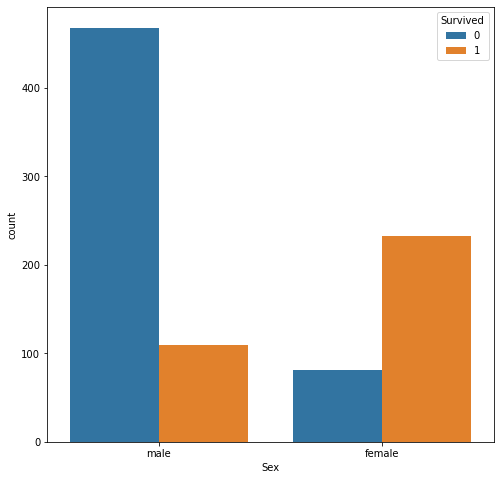

In [10]:
plt.figure(figsize =(8,8))
sns.countplot(data=df , x=df['Sex'] , hue=df['Survived']);

In [11]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [12]:
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


From This graph we can see that the number of females survivors is more than the number of male ones and the number of deceased males in more than the number of female ones

In [13]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

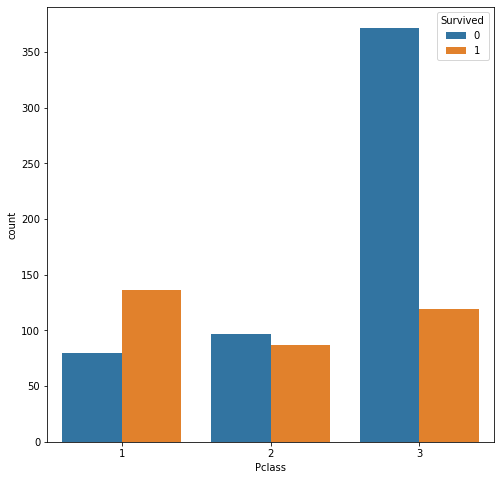

In [14]:
plt.figure(figsize =(8,8))
sns.countplot(data=df , x=df['Pclass'] , hue=df['Survived']);

In [15]:
survive_rate = df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

As predicted the survior rates is higher as the passenger degree is higher, first class has the highest survivor rate and third class has the lowest survivor rate

In [16]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


We can see that the survivor rate was higher as the passenger brought fewer dependants, passengers who brought less than 3 dependants survived more than passengers who brought 3 or more, and passengers who brought 5 or more didn't survive at all

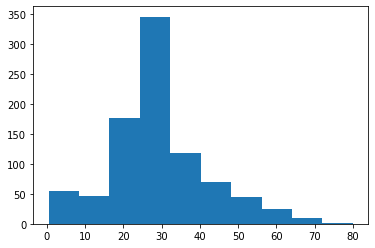

In [17]:
plt.hist(df['Age']);

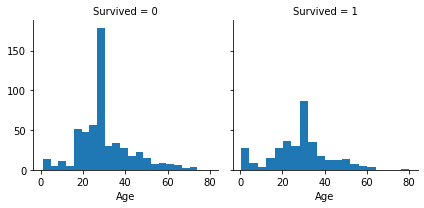

In [18]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20);

From the graphs we can see that most of the deceased were aroung 30 years old, which agrees with the fact that they prioritized the elders in the order to ride the boats

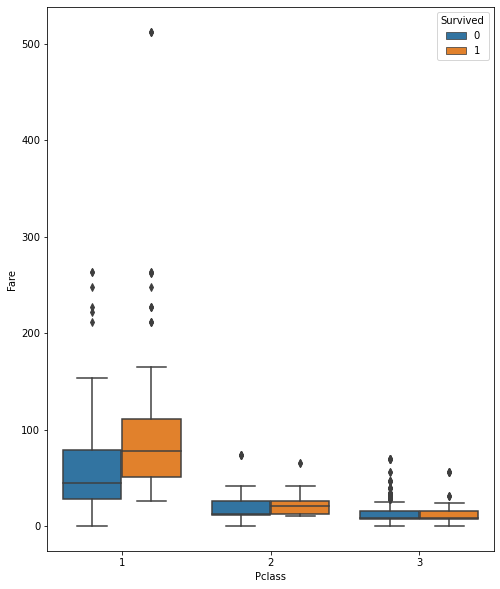

In [19]:
plt.figure(figsize =(8,10))
sns.boxplot(data=df , x=df['Pclass'] , y=df['Fare'] , hue=df['Survived']);

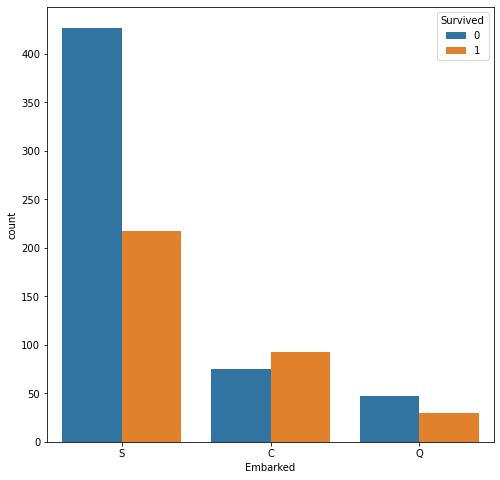

In [20]:
plt.figure(figsize =(8,8))
sns.countplot(data=df , x=df['Embarked'] , hue=df['Survived']);

In [21]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The total number of passengers who embarked from Southampton is 644 passenger and only around 220 survived and the rest was dead, also southampton had the highest number of deceased with more than 400 passenger dead